Import data for train/test

In [1]:
import numpy as np
x_train = np.load('processed_data/first_experiment/x_train.npy')
x_test = np.load('processed_data/first_experiment/x_test.npy')
y_train = np.load('processed_data/first_experiment/y_train.npy')
y_test = np.load('processed_data/first_experiment/y_test.npy')

Define a model for SER

In [2]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, MaxPooling1D, LSTM, TimeDistributed, Input

In [3]:
model = Sequential()
model.add(TimeDistributed(Conv1D(64, kernel_size=(3), activation='relu', strides=(1)), input_shape = (128, 104, 1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=(2), strides=(2))))

model.add(TimeDistributed(Conv1D(64, kernel_size=(3), activation='relu', strides=(1))))
model.add(TimeDistributed(MaxPooling1D(pool_size=(4), strides=(4))))

model.add(TimeDistributed(Conv1D(128, kernel_size=(3), activation='relu', strides=(1))))
model.add(TimeDistributed(MaxPooling1D(pool_size=(4), strides=(4))))

# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', strides=(1, 1)))
# model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))
model.add(TimeDistributed(Flatten()))

# define LSTM model
model.add(LSTM(128, return_sequences=True))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 128, 102, 64)      256       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 128, 51, 64)       0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 128, 49, 64)       12352     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 128, 12, 64)       0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 128, 10, 128)      24704     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 128, 2, 128)       0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 128, 256)          0

In [4]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='auto', restore_best_weights=True)
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/50
15/15 [==============================] - 13s 421ms/step - loss: 2.4011 - accuracy: 0.1350 - val_loss: 2.0346 - val_accuracy: 0.2301
Epoch 2/50
15/15 [==============================] - 5s 303ms/step - loss: 1.9384 - accuracy: 0.2168 - val_loss: 1.7860 - val_accuracy: 0.4248
Epoch 3/50
15/15 [==============================] - 5s 304ms/step - loss: 1.8544 - accuracy: 0.2743 - val_loss: 1.7104 - val_accuracy: 0.3717
Epoch 4/50
15/15 [==============================] - 5s 303ms/step - loss: 1.6708 - accuracy: 0.3518 - val_loss: 1.6734 - val_accuracy: 0.3363
Epoch 5/50
15/15 [==============================] - 5s 304ms/step - loss: 1.6134 - accuracy: 0.3186 - val_loss: 1.4020 - val_accuracy: 0.4690
Epoch 6/50
15/15 [==============================] - 5s 304ms/step - loss: 1.3494 - accuracy: 0.4580 - val_loss: 1.3042 - val_accuracy: 0.4336
Epoch 7/50
15/15 [==============================] - 5s 304ms/step - loss: 1.2589 - accuracy: 0.5022 - val_loss: 1.6336 - val_accuracy: 0.4602
Epoch

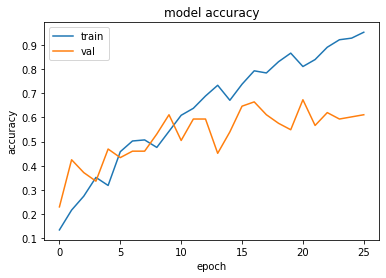

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

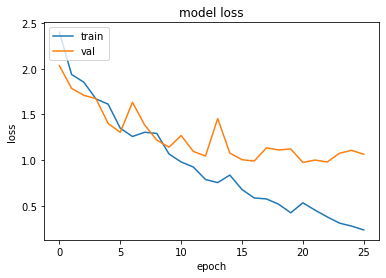

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [7]:
_, accuracy_test_original = model.evaluate(x_test, y_test)
print('Accuracy on original test data: {:4.2f}%'.format(accuracy_test_original * 100))

4/4 [==============================] - 1s 92ms/step - loss: 0.9742 - accuracy: 0.6726
Accuracy on original test data: 67.26%


Save the model for future computations

In [16]:
model.save('trained_models/CNN_LSTM1.h5')